In [61]:
import cv2
from skimage import feature, exposure
import matplotlib.pyplot as plt
from os import path
import numpy as np

In [105]:
IMAGE_DIR = "C:\\Users\\12779\\Desktop\\CelebAMask-HQ\\CelebAMask-HQ\\CelebA-HQ-img"
MASK_DIR = "C:\\Users\\12779\\Desktop\\CelebAMask-HQ\\CelebAMask-HQ\\CelebAMask-HQ-mask-anno\\0"

anno = ["skin", "hair", "mouth", "neck", "nose", "cloth", "eye_g", "ear_r", "neck_l", "hat",
        "l_brow", "r_brow", "l_eye", "r_eye", "l_lip", "u_lip", "l_ear", "r_ear"]

pic_id = list(range(10))


In [126]:
color = {}
np.random.seed(0)
for a in anno:
    c = np.array(np.random.choice(range(256), size=3)) / 255
    color[a.split("_")[-1]] = c

In [127]:
def get_hog(image):
    fd, hog_image = feature.hog(image, orientations=12, pixels_per_cell=(32, 32),
                            cells_per_block=(2, 2), visualize=True, channel_axis=2)

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_image_rescaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

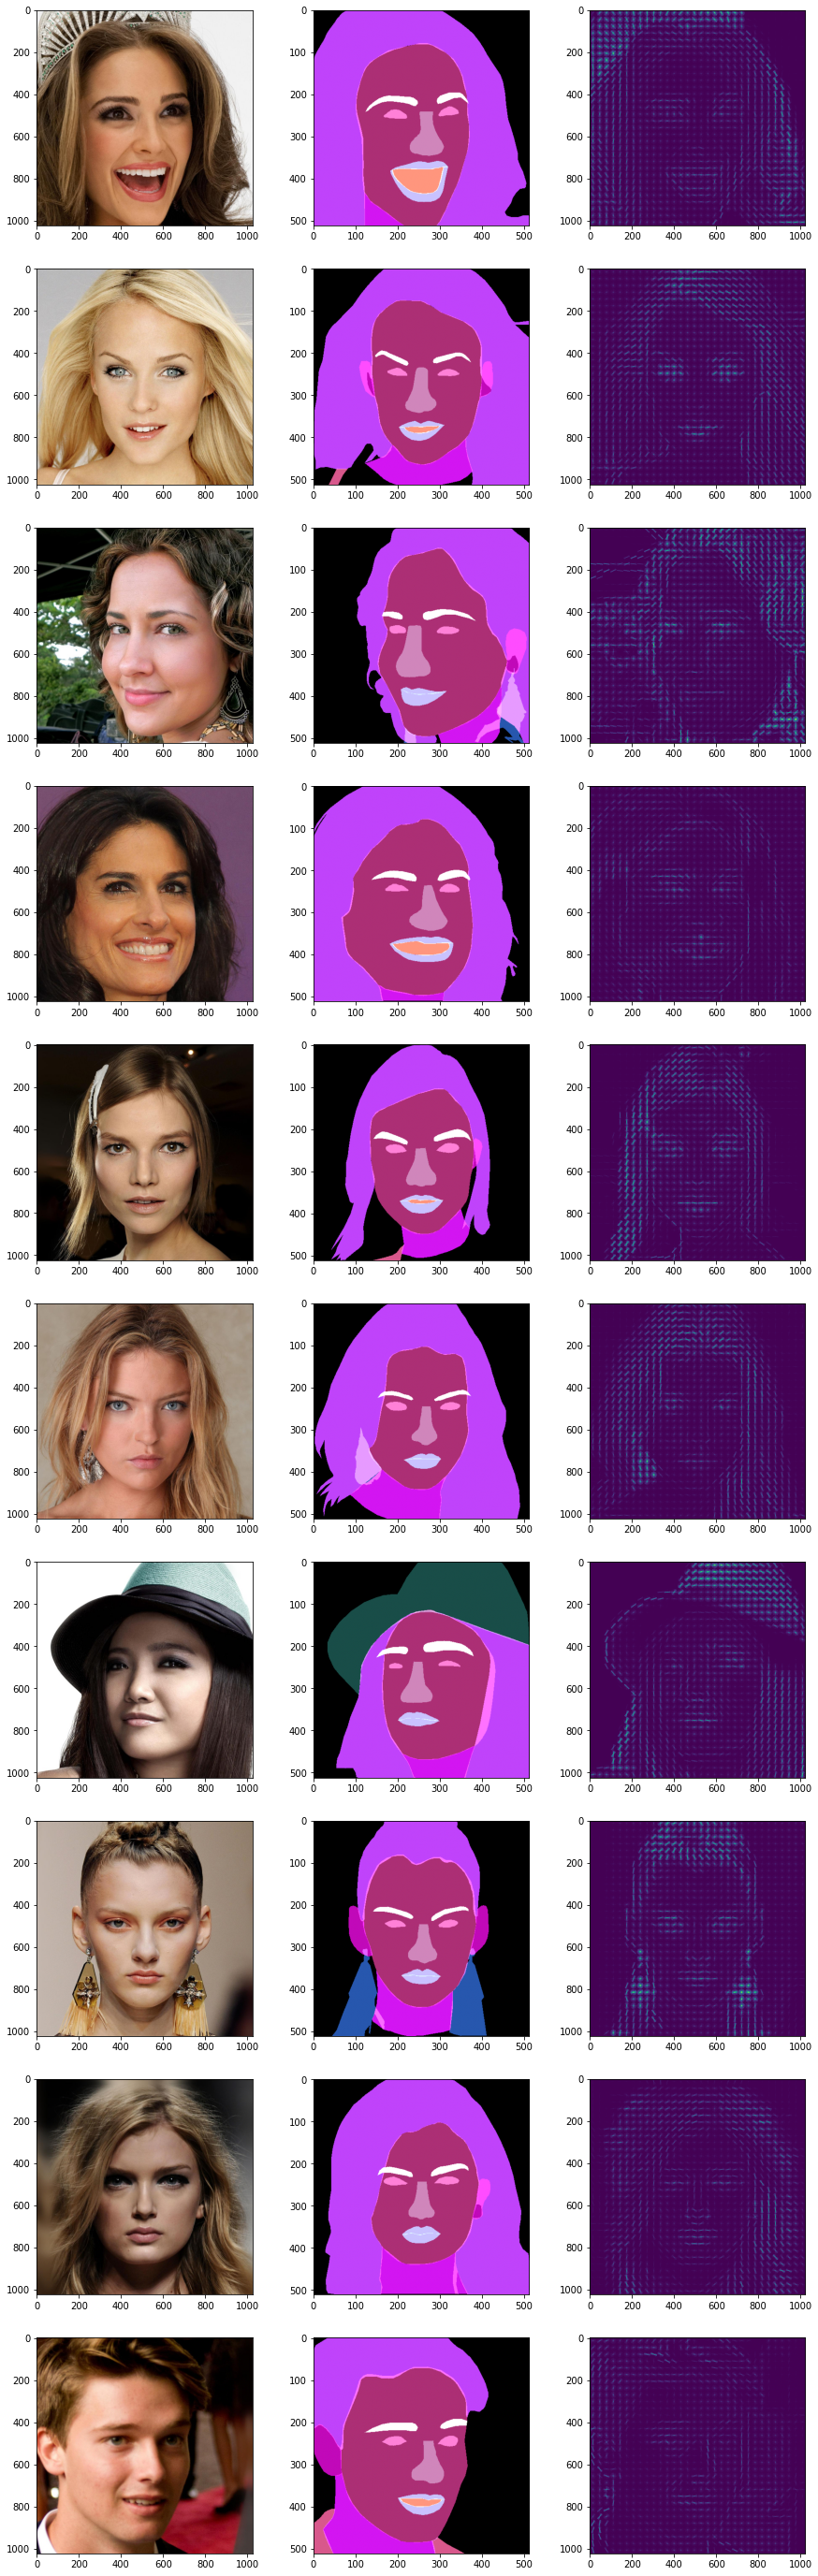

In [129]:
plt.figure(figsize=(15, 5 * len(pic_id)))

for id, idx in enumerate(pic_id):
    image_dir = path.join(IMAGE_DIR, str(id) + ".jpg")
    img = cv2.imread(image_dir)[:,:,::-1]

    mask = None
    for a in anno:
        mask_dir = path.join(MASK_DIR, "_".join(
            [str(id).zfill(5), a]) + ".png")

        if path.exists(mask_dir):
            m = cv2.imread(mask_dir) / 255
            m = m * color[a.split("_")[-1]]
            mask = mask + m if mask is not None else m

    plt.subplot(len(pic_id), 3, idx*3+1)
    plt.imshow(img)
    plt.subplot(len(pic_id), 3, idx*3+2)
    plt.imshow(mask)
    plt.subplot(len(pic_id), 3, idx*3+3)
    plt.imshow(get_hog(img))
